# Titanic: Machine Learning from Disaster 泰坦尼克号生存率预测

<img src="Image/website.png" width="100%">

### 主页 

https://www.kaggle.com/c/titanic

### 项目背景

泰坦尼克号于1909年3月31日在爱尔兰动工建造，1911年5月31日下水，次年4月2日完工试航。她是当时世界上体积最庞大、内部设施最豪华的客运轮船，有“永不沉没”的美誉。然而讽刺的是，泰坦尼克号首航便遭遇厄运：1912年4月10日她从英国南安普顿出发，途径法国瑟堡和爱尔兰昆士敦，驶向美国纽约。在14日晚23时40分左右，泰坦尼克号与一座冰山相撞，导致船体裂缝进水。次日凌晨2时20分左右，泰坦尼克号断为两截后沉入大西洋，其搭载的2224名船员及乘客，在本次海难中逾1500人丧生。

虽然在生存中有一些运气因素，但由于船长的一声“让女人和孩子先走！”，似乎有些人比其他人更有可能生存。

<img src="Image/titanic.jpg" width="100%">


Kaggle平台为我们提供了一个竞赛案例“Titanic: Machine Learning from Disaster”，在该案例中，我们将探究**什么样的人在此次海难中幸存的几率更高，并使用乘客数据（即姓名、年龄、性别、社会经济阶层等）通过构建预测模型来预测乘客生存率。**

## Kaggle实战解题的基本步骤
1. 总览问题和目标，是什么数学问题，希望得到什么结果
2. 获取数据
3. 探索数据：进一步获取更深层次的信息（可以使用可视化）
4. 数据预处理、特征工程等
6. 构建不同的模型加以训练
7. 进行模型验证并微调模型(超参数)
8. 产生结果提交

### 1. 总览问题和目标，是什么数学问题，希望得到什么结果

- 用机器学习的术语定义目标
- 判断是什么类型的问题，监督非监督，在线离线等等
- 怎么进行性能评估
- 有类似的问题吗？是否可以重用解决方案和工具

#### 定义目标

> 训练一个模型 $f(X)$，输入乘客特征$X$，预测该乘客是否能生存$y_{pred}$，将预测结果$y_{pred}$与真实值$y_{true}$进行比较，尽可能使其误差变小。

#### 问题类型
> 有监督问题，二分类问题

#### 性能评估
> 准确率
**accuracy** = (TP+TN)/(TP+TN+FP+FN)

<img src="Image/accuracy.png" width="60%">

#### 有类似的问题吗？
> 第一个项目，暂未遇到过类似问题

### 2. 获取数据
- 列出所需要的数据
- 检查需要占用的空间
- 获取数据
- 检查数据的大小和类型，比如时间序列，样本，和地理位置

#### 列出所需要的数据
> 数据集： https://www.kaggle.com/c/titanic/data

#### 检查需要占用的空间
> 90.9 KB

#### 获取数据
> 注册项目后可点击download直接下载

#### 检查数据的大小和类型
数据已分为两组：
- 训练集（train.csv）
- 测试集（test.csv）

训练集应用于构建您的机器学习模型。训练集提供了每位乘客最终生存与否的结果。

测试集用来查看模型在未知数据上的表现如何。测试集不提供每位乘客的最终生存与否的情况。请使用训练后的模型对测试集中的每个乘客预测，预测他们是否在泰坦尼克号沉没中幸存下来。

数据集中还包括*gender_submission.csv*，这是一组假设所有女性乘客都可以幸存的预测结果，作为*提交文件的示例*。

数据字段如下：

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>中文</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>是否幸存</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>乘客等级</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td>性别</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td>年龄</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td>同行旁系亲属个数</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td>同行直系亲属个数</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td>船票编号</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td>船票价格</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td>客舱编号</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>登船港口</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

- pclass：乘客等级，社会经济地位的缩影
    - 1st =一等舱位
    - 2nd =二等舱位
    - 3rd =三等舱位
- Age	：如果年龄小于1，则年龄是小数。如果估计年龄，则以xx.5的形式出现
- sibsp：旁系亲属家庭关系
    - 兄弟姐妹=兄弟，姐妹，同父异母的弟弟，义妹
    - 配偶=丈夫，妻子（包二奶和未婚夫被忽略）
- parch：直系亲属家庭关系
    - 父=母亲，父亲
    - 儿童=女儿，儿子，继女，继子
    - 有些孩子只带一个保姆旅行，因此他们的这个特征等于0。

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# 训练集
train_set = pd.read_csv("dataset/tit/train.csv")
print(train_set.shape)
train_set.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 测试集
test_set = pd.read_csv("dataset/titanic/test.csv")
print(test_set.shape)
test_set.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# 提交文件的示例
submit_example = pd.read_csv("dataset/titanic/gender_submission.csv")
print(submit_example.shape)
submit_example.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 3. 探索数据：进一步获取更深层次的信息
- 创建数据集的一个副本。如有必要，取样到适合大小。
- 创建jupyter文件，保存数据探索的过程。
- 研究每个属性及其特征
    - 名称
    - 类型(数值型，类别型，文本等)
    - 缺失值的百分比
    - 噪声和噪声类型(随机、异常值、舍弃误差等)
    - 分布类型，高斯？正态？均匀？对数？
- 如果是监督问题，确定标记出目标值。
- 可视化数据
- 研究不同属性间的相关性(corr)
- 研究通常怎么解决该问题
- 确定您可能想要应用的有希望的转换。
- 记录所得到的结果

In [4]:
import numpy as np
#查看数据信息
train_set.info()
print(train_set.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    

In [5]:
# 研究各个属性
connect = [train_set,test_set]

In [6]:
for item in connect:
    item["Sex"][item["Sex"] == "female"] = 0
    item['Sex'][item["Sex"] == "male"] = 1
    item['Sex'] = item['Sex'].astype(int)
train_set[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Sex,Survived
0,0,0.742038
1,1,0.188908


In [7]:
train_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_set[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_set[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


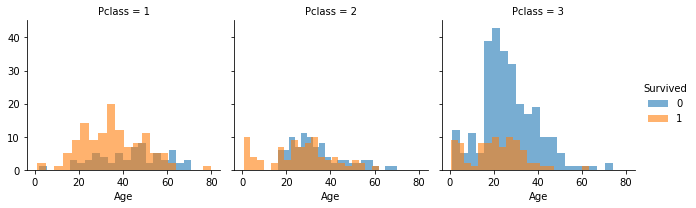

In [10]:
grid = sns.FacetGrid(train_set, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.6, bins=20)
grid.add_legend();

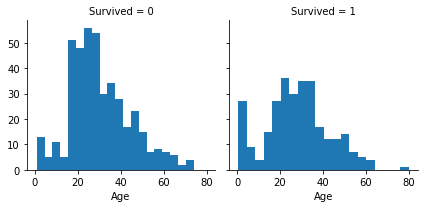

In [11]:
ageCopy = train_set.loc[:,["Survived","Age"]]
ageGraph = sns.FacetGrid(ageCopy, col='Survived')
ageGraph.map(plt.hist, 'Age', bins=20)

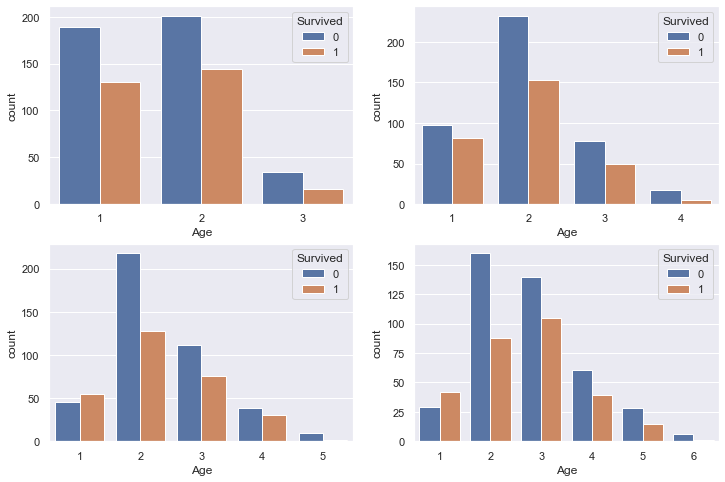

In [12]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(12, 8))
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    partion = pd.cut(train_set['Age'],i+2)
    ax = sns.countplot(x=partion, hue="Survived", data=train_set)
    ax.set_xticklabels(np.arange(1,i+3))
#     plt.xticks([])

### 4. 数据预处理
- 数据清洗（缺失值以及异常值的处理）
- 特征工程（基于对现有数据特征的理解构造的新特征，以挖掘数据的更多特点）- 筛选子集（对数据进行降维，选择子集）

In [13]:
#删除无关特征
train_set = train_set.drop(["Ticket","Cabin",'PassengerId'],axis = 1)
test_set = test_set.drop(["Ticket","Cabin"],axis = 1)
print(train_set.info())
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int32  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int32  
 4   Age          332 non-null   

In [14]:
connect = [train_set, test_set]
for item in connect:
    item['Title'] = item.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_set['Title'], train_set['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [15]:
for item in connect:
    item['Title'] = item['Title'].replace(["Dona",'Don', 'Dr', "Rev",'Capt','Countess','Col','Jonkheer',"Lady",'Major','Sir'], 'others')
    item['Title'] = item['Title'].replace('Mlle', 'Miss')
    item['Title'] = item['Title'].replace('Ms', 'Miss')
    item['Title'] = item['Title'].replace('Mme', 'Mrs')
    
train_set[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,others,0.347826


In [16]:
for item in connect:
    item.loc[item["Title"]== "Master","Title"] = 0
    item.loc[item["Title"]== "Miss","Title"] = 1
    item.loc[item["Title"]== "Mr","Title"] = 2
    item.loc[item["Title"]== "Mrs","Title"] = 3
    item.loc[item["Title"]== "others","Title"] = 4
    item["Title"] = item["Title"].astype(int)
    
train_set[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,0,0.575000
1,1,0.702703
2,2,0.156673
3,3,0.793651
4,4,0.347826


In [17]:
modeNum = train_set.Embarked.dropna().mode()[0]
for item in connect:
    item['Embarked'] = item['Embarked'].fillna(modeNum)
    item.loc[item["Embarked"]== "C","Embarked"] =0
    item.loc[item["Embarked"]== "Q","Embarked"] =1
    item.loc[item["Embarked"]== "S","Embarked"] =2
train_set[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,0,0.553571
1,1,0.389610
2,2,0.339009


In [18]:
train_set = train_set.drop(["Name"],axis = 1)
test_set = test_set.drop(["Name"],axis = 1)

In [19]:
test_set['Fare'].fillna(test_set['Fare'].dropna().median(), inplace=True)
connect = [train_set,test_set]

In [20]:
replaceAge = np.zeros((2,3))
for item in connect:
    for i in range(0, 2):
        for j in range(0, 3):
            originDf = item[(item['Sex'] == i) & (item['Pclass'] == j+1)]['Age']
            originDf.dropna()
            replaceAge[i,j] = int(originDf.median())
    for i in range(0, 2):
        for j in range(0, 3):
            item.loc[(item.Age.isnull()) & (item.Sex == i) & (item.Pclass == j+1),'Age'] = replaceAge[i,j]
    item['Age'] = item['Age'].astype(int)
print(replaceAge)

[[41. 24. 22.]
 [42. 28. 24.]]


In [21]:
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    int32  
dtypes: float64(1), int32(3), int64(4), object(1)
memory usage: 52.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   SibSp        418 non-null    int6

In [22]:
# train_set['AgeBd'] = pd.cut(train_set['Age'], 5) 
# train_set[['AgeBd', 'Survived']].groupby(['AgeBd'], as_index=False).mean().sort_values(by='AgeBd', ascending=True)
connect = [train_set,test_set]

In [23]:
model = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform') # 设置5个箱
model.fit(train_set['Age'].values.reshape(-1,1)) # 在训练集上训练
for item in connect:    
    item['AgeBd'] = model.transform(item['Age'].values.reshape(-1,1)).reshape(-1) # 转换训练集
#     item.loc[ item['Age'] <= 16, 'Age'] = 0
#     item.loc[(item['Age'] > 16) & (item['Age'] <= 32), 'Age'] = 1
#     item.loc[(item['Age'] > 32) & (item['Age'] <= 48), 'Age'] = 2
#     item.loc[(item['Age'] > 48) & (item['Age'] <= 64), 'Age'] = 3
#     item.loc[ item['Age'] > 64, 'Age'] =4
    item['AgeBd'] = item['AgeBd'].astype(int)
    item.drop(["Age"],axis = 1,inplace = True)

In [24]:
train_set.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeBd
0,0,3,1,1,0,7.2500,2,2,1
1,1,1,0,1,0,71.2833,0,3,2
2,1,3,0,0,0,7.9250,2,1,1
3,1,1,0,1,0,53.1000,2,3,2
4,0,3,1,0,0,8.0500,2,2,2


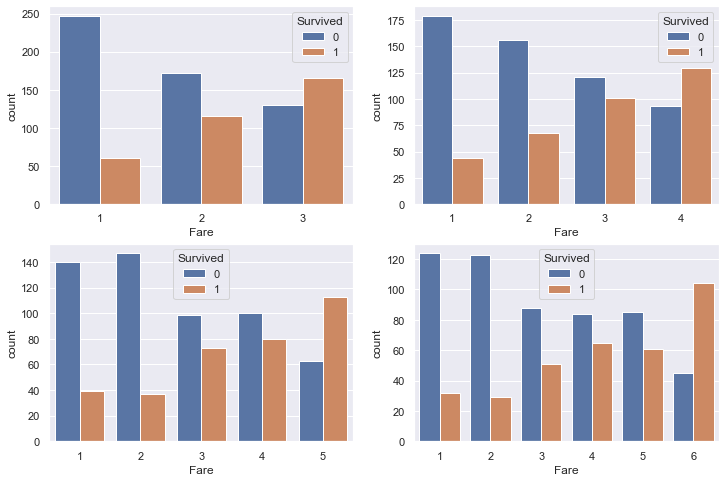

In [25]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(12, 8))
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    partion = pd.qcut(train_set['Fare'],i+2)
    ax = sns.countplot(x=partion, hue="Survived", data=train_set)
    ax.set_xticklabels(np.arange(1,i+3))
#     plt.xticks([])

In [26]:
# train_set['FareBd'] = pd.qcut(train_set['Fare'], 4) 
# train_set[['FareBd', 'Survived']].groupby(['FareBd'], as_index=False).mean().sort_values(by='FareBd', ascending=True)

In [27]:
train_set.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,AgeBd
0,0,3,1,1,0,7.2500,2,2,1
1,1,1,0,1,0,71.2833,0,3,2
2,1,3,0,0,0,7.9250,2,1,1
3,1,1,0,1,0,53.1000,2,3,2
4,0,3,1,0,0,8.0500,2,2,2


In [28]:
model = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile') # 设置4个箱
model.fit(train_set['Fare'].values.reshape(-1,1)) # 在训练集上训练
connect = [train_set,test_set]
for item in connect:    
#     item.loc[ item['Fare'] <= 7.91, 'Fare'] = 0
#     item.loc[(item['Fare'] > 7.91) & (item['Fare'] <= 14.454), 'Fare'] = 1
#     item.loc[(item['Fare'] > 14.454) & (item['Fare'] <= 31.0), 'Fare'] = 2
#     item.loc[(item['Fare'] > 31.0) & (item['Fare'] <= 512.329), 'Fare'] = 3
#     item.loc[ item['Fare'] > 512.329, 'Fare'] =4  
    item['FareBd'] = model.transform(item['Fare'].values.reshape(-1,1)).reshape(-1) # 转换训练集
    item['FareBd'] = item['FareBd'].astype(int)
    item = item.drop(["Fare"],axis = 1,inplace = True)

In [29]:
train_set[['FareBd', 'Survived']].groupby(['FareBd'], as_index=False).mean().sort_values(by='FareBd', ascending=True)

,FareBd,Survived
0,0,0.197309
1,1,0.308756
2,2,0.442478
3,3,0.582222


In [30]:
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    int32 
 3   SibSp     891 non-null    int64 
 4   Parch     891 non-null    int64 
 5   Embarked  891 non-null    object
 6   Title     891 non-null    int32 
 7   AgeBd     891 non-null    int32 
 8   FareBd    891 non-null    int32 
dtypes: int32(4), int64(4), object(1)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Sex          418 non-null    int32 
 3   SibSp        418 non-null    int64 
 4   Parch        418 non-null    int64 
 5   Embarked     418 non-

In [31]:
print(train_set.head())

   Survived  Pclass  Sex  SibSp  Parch Embarked  Title  AgeBd  FareBd
0         0       3    1      1      0        2      2      1       0
1         1       1    0      1      0        0      3      2       3
2         1       3    0      0      0        2      1      1       1
3         1       1    0      1      0        2      3      2       3
4         0       3    1      0      0        2      2      2       1


In [32]:
connect = [train_set,test_set]
for item in connect:
    item['Family'] = item['SibSp'] + item['Parch'] + 1

train_set[['Family', 'Survived']].groupby(['Family'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


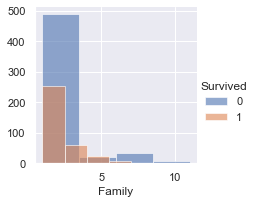

In [33]:
grid = sns.FacetGrid(train_set, hue='Survived')
grid.map(plt.hist, 'Family', alpha=.6, bins=4)
grid.add_legend();

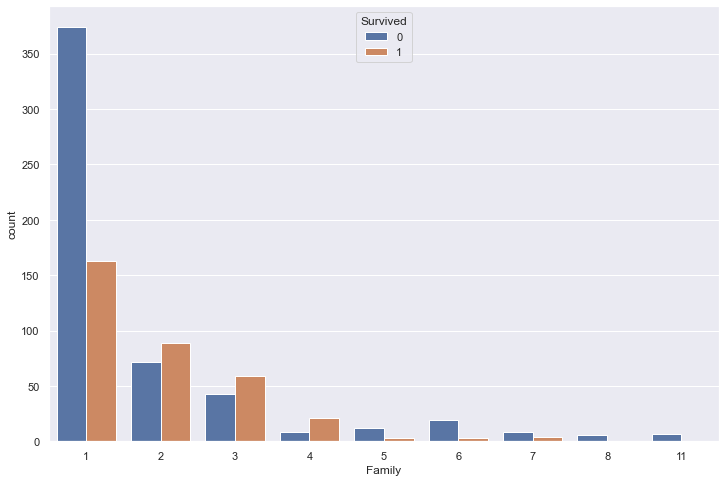

In [34]:
sns.set(style="darkgrid")
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax = sns.countplot(x="Family", hue="Survived", data=train_set)
#     plt.xticks([])

In [35]:
# connect = [train_set,test_set]
# for item in connect:    
#     item.loc[ item['Family'] == 1, 'Family'] = 0
#     item.loc[ item['Family'] == 2 , 'Family'] = 1
#     item.loc[ item['Family'] == 3 , 'Family'] = 2
#     item.loc[ item['Family'] == 4 , 'Family'] = 3
#     item.loc[ item['Family'] >= 5, 'Family'] =4
#     item['Family'] = item['Family'].astype(int)
#     item = item.drop(["SibSp","Parch"],axis = 1)
    


In [36]:
# connect = [train_set,test_set]
# for item in connect:   
#     item.loc[ item['Family'] == 1, 'Family'] = 0
#     item.loc[ item['Family'] == 2 , 'Family'] = 1
#     item.loc[ item['Family'] == 3 , 'Family'] = 2
#     item.loc[ item['Family'] == 4 , 'Family'] = 3
#     item.loc[ item['Family'] == 5, 'Family'] = 5
#     item.loc[ item['Family'] == 6, 'Family'] = 6
#     item.loc[ item['Family'] >= 7, 'Family'] = 7
#     item = item.drop(["SibSp","Parch"],axis = 1)
#     item['Family'] = item['Family'].astype(int)
#     print(item.shape)

In [37]:
connect = [train_set,test_set]
for item in connect:    
    item.loc[ item['Family'] == 1, 'Family'] = 0
    item.loc[ item['Family'] > 1, 'Family'] =1
    item['Family'] = item['Family'].astype(int)
    item = item.drop(["SibSp","Parch"],axis = 1)
    


In [38]:
train_set.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeBd,FareBd,Family
0,0,3,1,1,0,2,2,1,0,1
1,1,1,0,1,0,0,3,2,3,1
2,1,3,0,0,0,2,1,1,1,0
3,1,1,0,1,0,2,3,2,3,1
4,0,3,1,0,0,2,2,2,1,0


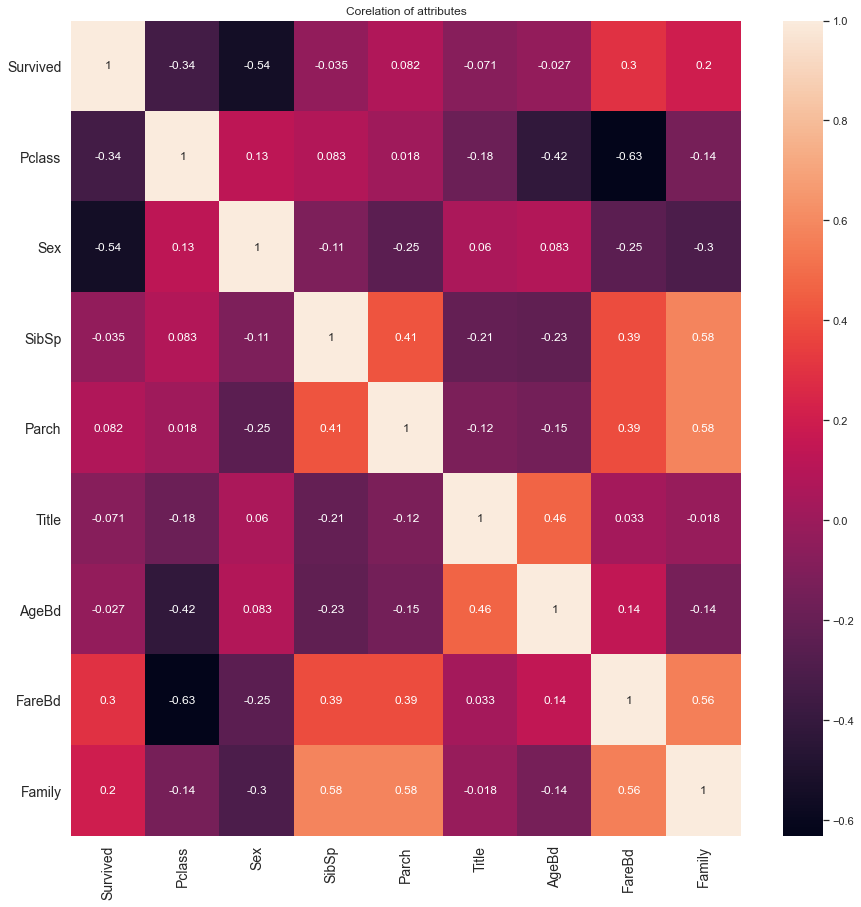

In [39]:
sns.heatmap(train_set.corr(), annot=True).set_title("Corelation of attributes")
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### 5. 构建不同的模型加以训练
- 选择各种不同的但是适合该类型问题的模型对训练集进行训练
- 使用标准参数，从不同的类别(例如线性、朴素贝叶斯、SVM、随机森林、神经网络等)快速训练基本的模型。
- 度量，比较不同模型之间的性能

In [40]:
X_train = train_set.drop("Survived", axis=1)
Y_train = train_set["Survived"]
X_test  = test_set.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [42]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    int64 
 1   Sex       891 non-null    int32 
 2   SibSp     891 non-null    int64 
 3   Parch     891 non-null    int64 
 4   Embarked  891 non-null    object
 5   Title     891 non-null    int32 
 6   AgeBd     891 non-null    int32 
 7   FareBd    891 non-null    int32 
 8   Family    891 non-null    int32 
dtypes: int32(5), int64(3), object(1)
memory usage: 45.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    418 non-null    int64 
 1   Sex       418 non-null    int32 
 2   SibSp     418 non-null    int64 
 3   Parch     418 non-null    int64 
 4   Embarked  418 non-null    object
 5   Title     418 non-null    int32 
 6   AgeB

In [43]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_predL = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2
acc_log

80.36

In [44]:
coeff_df = pd.DataFrame(train_set.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Family,0.688969
7,FareBd,0.211396
4,Embarked,-0.168622
3,Parch,-0.252235
5,Title,-0.322812
6,AgeBd,-0.385582
2,SibSp,-0.576915
0,Pclass,-0.899832
1,Sex,-2.528621


In [45]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_predS = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.61

In [46]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
Y_predK = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.4

In [47]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_predG = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

acc_gaussian

78.9

In [48]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_predP = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [49]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_predLS = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.36

In [50]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_predSG = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

acc_sgd

74.97

In [51]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predD = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.89

In [52]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,random_state=0)
random_forest.fit(X_train, Y_train)
Y_predR = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

88.89

In [53]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm',
             'SVC',
             'Logistic Regression',
             'KNN',
             'Decision Tree',
             'Naive Bayes',
             'Random Forest',
            "Stochastic Gradient Descent",
            "Perceptron"]
models=[LinearSVC(),
        SVC(),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=5),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(n_estimators=100),
        SGDClassifier(),
       Perceptron()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers).sort_values(by ="CV Mean",ascending =False)       
new_models_dataframe2

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

,CV Mean,Std
SVC,0.828377,0.053441
Random Forest,0.809238,0.037386
Decision Tree,0.801386,0.041832
Logistic Regression,0.799226,0.053498
Linear Svm,0.796966,0.056364
KNN,0.792422,0.050532
Naive Bayes,0.787978,0.060311
Perceptron,0.773321,0.042671
Stochastic Gradient Descent,0.727266,0.113050


### 6. 进行模型验证并微调模型(超参数)
- 筛选表现较好的模型，进行进一步优化，微调模型的超参数观察模型得分变化
- 使用交叉验证微调超参数

In [54]:
#模型调整
score = [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': score})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.89
8,Decision Tree,88.89
1,KNN,84.40
0,Support Vector Machines,83.61
2,Logistic Regression,80.36
7,Linear SVC,80.36
4,Naive Bayes,78.90
5,Perceptron,78.34
6,Stochastic Gradient Decent,74.97


In [55]:
# from sklearn.model_selection import GridSearchCV
# n_estimators=range(100,1000,100)
# hyper={'n_estimators':n_estimators}
# gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
# gd.fit(X_train,Y_train)
# print(gd.best_score_)
# print(gd.best_estimator_)

In [56]:
# from sklearn.model_selection import GridSearchCV
# C=[2,2.1,2.5]
# gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# kernel=['rbf','linear']
# hyper={'kernel':kernel,'C':C,'gamma':gamma}
# gd=GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)
# gd.fit(X_train,Y_train)
# print(gd.best_score_)
# print(gd.best_estimator_)

### 7. 产生结果提交，总结
- 将训练好的模型应用于测试集，并将产生的结果提交到kaggle页面
- 记录已经完成的工作
- 试图解释为什么该方案实现了目标
- 通过漂亮的可视化或容易记住的陈述来传达你的关键发现

In [57]:
# model = ["SVC","Random Forest","Decision Tree","Logistic Regression","KNN",
#          "Linear Svm","Naive Bayes","Stochastic Gradient Descent","Perceptron"]
# score = [x**2 for x in score]
# def blend_models_predict(score):
#     return (score[0]/sum(score) * Y_predS) + \
#             (score[1]/sum(score) * Y_predR) + \
#             (score[2]/sum(score) * Y_predD) + \
#             (score[3]/sum(score) * Y_predL) + \
#             (score[4]/sum(score) * Y_predK) + \
#             (score[5]/sum(score) * Y_predLS) + \
#             (score[6]/sum(score) * Y_predG)+\
#             (score[7]/sum(score) * Y_predSG)+\
#             (score[8]/sum(score) * Y_predP)
# #     return (Y_predS + Y_predR + Y_predD + Y_predL + Y_predK +  Y_predLS + Y_predG + Y_predSG + Y_predP)/8

In [58]:
model = ["SVC","Random Forest","Decision Tree","Logistic Regression","KNN",
         "Linear Svm","Naive Bayes","Stochastic Gradient Descent","Perceptron"]
score = [x**2 for x in score]
def blend_models_predict(score):
    return (0.35* Y_predS) + \
            (0.25 * Y_predR) + \
            (0.05 * Y_predD) + \
            (0.1 * Y_predL) + \
            (0.1 * Y_predK) + \
            (0.05 * Y_predLS) + \
            (0.05 * Y_predG)+\
            (0.05 * Y_predSG)+\
            (0.05 * Y_predP)

In [60]:
submission = pd.DataFrame({
        "PassengerId": test_set["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)